## Show a general simulation process
plot experiments results for analysis

In [ ]:
import pandas as pd
import json
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'png'
matplotlib.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt
import seaborn
matplotlib.style.use('seaborn')
seaborn.set_context("notebook", font_scale=0.25)

In [3]:
#Open a json file
with open('modular-experiments-15.json','r') as f:
    data = json.loads(f.read())

# Save data in a dataframe variable    
df_nested_list = pd.json_normalize(
    data, 
    record_path =['resultsets','epyc.resultset.default','results']
    )
df=df_nested_list

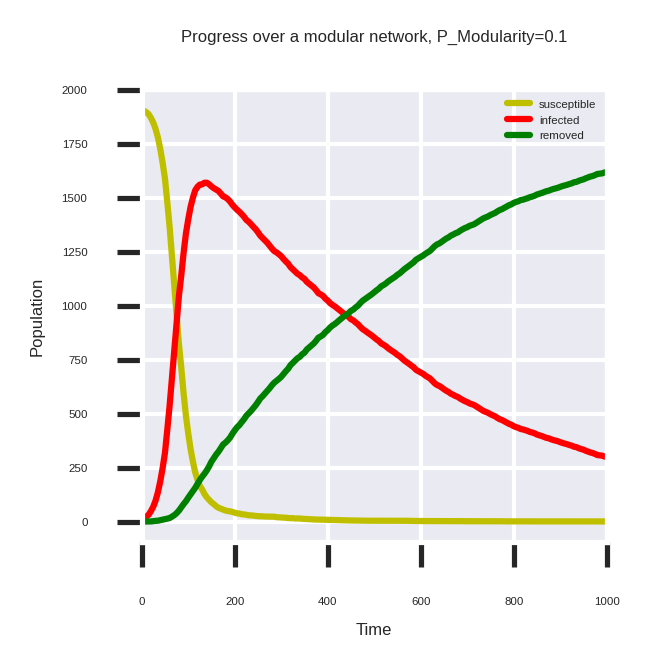

In [4]:
pm=[0.1]
n=3
for pc in pm:
    
    # filter the data we want
    df_filter = df.loc[df['parameters.modular.modularity']==pc]
    index=min(list(df_filter.index))
    ts_min = min(list(len(df_filter['results.epydemic.monitor.observations'][i]) for i in range(index,index+n) ))
    ts = df_filter['results.epydemic.monitor.observations'][index][0:ts_min]
   
    mean_sss=[]
    mean_iis=[]
    mean_rrs=[]
    
    # calculate the average value after running each experiment for 3 times
    # and save them in the lists 
    for m in range(ts_min):
        sum_ss=sum_ii=sum_rr=0
        for i in range(index,index+n):
            sum_ss += df['results.epydemic.monitor.timeseries-epydemic.sir.S'][i][m]
            sum_ii += df['results.epydemic.monitor.timeseries-epydemic.sir.I'][i][m]
            sum_rr += df['results.epydemic.monitor.timeseries-epydemic.sir.R'][i][m]

        mean_sss.append(sum_ss/n)
        mean_iis.append(sum_ii/n)
        mean_rrs.append(sum_rr/n)
        
    
    # Plot the graph
    fig = plt.figure(figsize=(2, 2))
    ax = fig.gca()

    # plot the size of the population
    ax.plot(ts, mean_sss, 'y', label='susceptible')
    ax.plot(ts, mean_iis, 'r', label='infected')
    ax.plot(ts, mean_rrs, 'g', label='removed')
    T=1000
    ax.set_xlabel('Time',fontsize=4)
    ax.set_xlim([0, T])
    ax.set_ylabel('Population',fontsize=4)
    ax.set_title('Progress over a modular network, P_Modularity={c}'.format(c=pc), y=1.05,fontsize=4)
    plt.legend(loc = 'upper right')
#     plt.savefig('./experiment1-'+str(pc)+'.jpg')
    plt.show()
    

## Results for different R in large modular networks
P_modularity=0.545

In [13]:
Results_large_R=[] 

In [17]:

# Read results in json format
with open('Results/modular-experiments-4.json','r') as f:
    data = json.loads(f.read())

df_nested_list = pd.json_normalize(
    data, 
    record_path =['resultsets','epyc.resultset.default','results']
    )
df=df_nested_list

#Calculate averages
pm=[0.545]
n=3
for pc in pm:
    df_filter = df.loc[df['parameters.modular.modularity']==pc]
    index=min(list(df_filter.index))
    ts_min = min(list(len(df_filter['results.epydemic.monitor.observations'][i]) for i in range(index,index+n) ))
    ts = df_filter['results.epydemic.monitor.observations'][index][0:ts_min]
   
    mean_sss=[]
    mean_iis=[]
    mean_rrs=[]
    
    # calculate the average value after running each experiment for 3 times
    for m in range(ts_min):
        sum_ss=sum_ii=sum_rr=0
        for i in range(index,index+n):
            sum_ss += df['results.epydemic.monitor.timeseries-epydemic.sir.S'][i][m]
            sum_ii += df['results.epydemic.monitor.timeseries-epydemic.sir.I'][i][m]
            sum_rr += df['results.epydemic.monitor.timeseries-epydemic.sir.R'][i][m]

        mean_sss.append(sum_ss/n)
        mean_iis.append(sum_ii/n)
        mean_rrs.append(sum_rr/n)
Results_large_R.append(mean_iis)

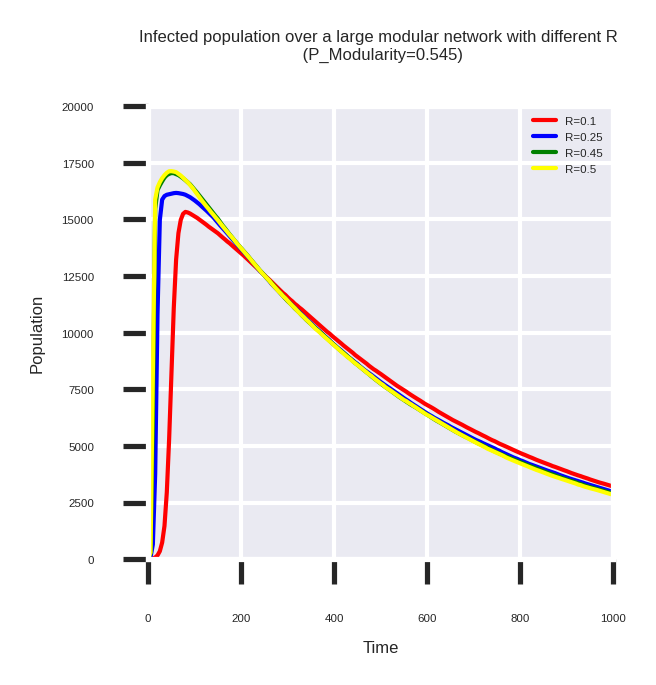

In [18]:

fig = plt.figure(figsize=(2, 2))
ax = fig.gca()

# plot the size of the infected population
ax.plot(ts, Results_large_R[0], 'r', label='R=0.1', linewidth=1)
ax.plot(ts, Results_large_R[1], 'b', label='R=0.25', linewidth=1)
ax.plot(ts, Results_large_R[2], 'g', label='R=0.45', linewidth=1)
ax.plot(ts, Results_large_R[3], 'yellow', label='R=0.5', linewidth=1)

T=1000
ax.set_xlabel('Time',fontsize=4)
ax.set_xlim([0, T])
ax.set_ylabel('Population',fontsize=4)
ax.set_title('Infected population over a large modular network with different R \n (P_Modularity=0.545)', y=1.05,fontsize=4)
plt.legend(loc = 'upper right')
plt.ylim(0,20000)
plt.show()

## Results for different R in small modular networks
P_modularity=0.545

In [19]:
Results_small_R=[] 

In [27]:
# Read results in json format
with open('Results/modular-experiments-8-improve.json','r') as f:
    data = json.loads(f.read())

df_nested_list = pd.json_normalize(
    data, 
    record_path =['resultsets','epyc.resultset.default','results']
    )
df=df_nested_list

#Calculate averages
pm=[0.545]
n=3
for pc in pm:
    df_filter = df.loc[df['parameters.modular.modularity']==pc]
    index=min(list(df_filter.index))
    ts_min = min(list(len(df_filter['results.epydemic.monitor.observations'][i]) for i in range(index,index+n) ))
    ts = df_filter['results.epydemic.monitor.observations'][index][0:ts_min]
   
    mean_sss=[]
    mean_iis=[]
    mean_rrs=[]
    
    # calculate the average value after running each experiment for 3 times
    for m in range(ts_min):
        sum_ss=sum_ii=sum_rr=0
        for i in range(index,index+n):
            sum_ss += df['results.epydemic.monitor.timeseries-epydemic.sir.S'][i][m]
            sum_ii += df['results.epydemic.monitor.timeseries-epydemic.sir.I'][i][m]
            sum_rr += df['results.epydemic.monitor.timeseries-epydemic.sir.R'][i][m]

        mean_sss.append(sum_ss/n)
        mean_iis.append(sum_ii/n)
        mean_rrs.append(sum_rr/n)
Results_small_R.append(mean_iis)

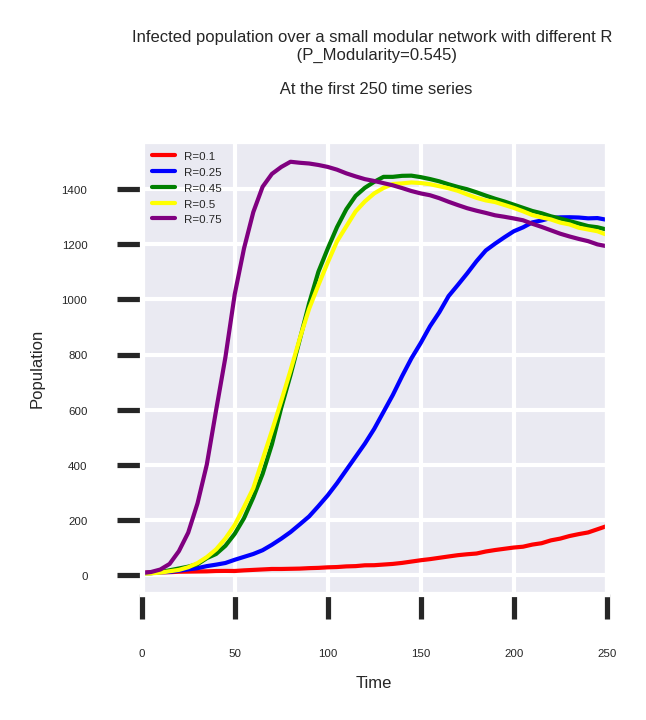

In [28]:
fig = plt.figure(figsize=(2, 2))
ax = fig.gca()

# plot the size of the infected population
ax.plot(ts, Results_small_R[0], 'r', label='R=0.1', linewidth=1)
ax.plot(ts, Results_small_R[1], 'b', label='R=0.25', linewidth=1)
ax.plot(ts, Results_small_R[2], 'g', label='R=0.45', linewidth=1)
ax.plot(ts, Results_small_R[3], 'yellow', label='R=0.5', linewidth=1)
ax.plot(ts, Results_small_R[4], 'purple', label='R=0.75', linewidth=1)
T=250
ax.set_xlabel('Time',fontsize=4)
ax.set_xlim([0, T])
ax.set_ylabel('Population',fontsize=4)
ax.set_title('Infected population over a small modular network with different R \n (P_Modularity=0.545)\n\n At the first 250 time series'.format(c=pc), y=1.05,fontsize=4)
plt.legend(loc = 'upper left')
plt.show()

## Results for different connectivity in large modular networks
R=0.1

In [51]:
Results_large_connectivity=[] 

In [52]:
# Read results in json format
with open('Results/modular-experiments-1.json','r') as f:
    data = json.loads(f.read())

df_nested_list = pd.json_normalize(
    data, 
    record_path =['resultsets','epyc.resultset.default','results']
    )
df=df_nested_list

In [53]:
#Calculate average
import  numpy
pModularity = numpy.linspace(0.10, 0.99 , num=5, endpoint=True)
pm=pModularity
n=3
for pc in pm:
    print(pc)
    df_filter = df.loc[df['parameters.modular.modularity']==pc]
    index=min(list(df_filter.index))
    ts_min = min(list(len(df_filter['results.epydemic.monitor.observations'][i]) for i in range(index,index+n) ))
    ts = df_filter['results.epydemic.monitor.observations'][index][0:ts_min]
   
    mean_sss=[]
    mean_iis=[]
    mean_rrs=[]
    
    # calculate the average value after running each experiment for 3 times
    for m in range(ts_min):
        sum_ss=sum_ii=sum_rr=0
        for i in range(index,index+n):
            sum_ss += df['results.epydemic.monitor.timeseries-epydemic.sir.S'][i][m]
            sum_ii += df['results.epydemic.monitor.timeseries-epydemic.sir.I'][i][m]
            sum_rr += df['results.epydemic.monitor.timeseries-epydemic.sir.R'][i][m]

        mean_sss.append(sum_ss/n)
        mean_iis.append(sum_ii/n)
        mean_rrs.append(sum_rr/n)
    Results_large_connectivity.append(mean_iis)

0.1
0.3225
0.545
0.7675
0.99


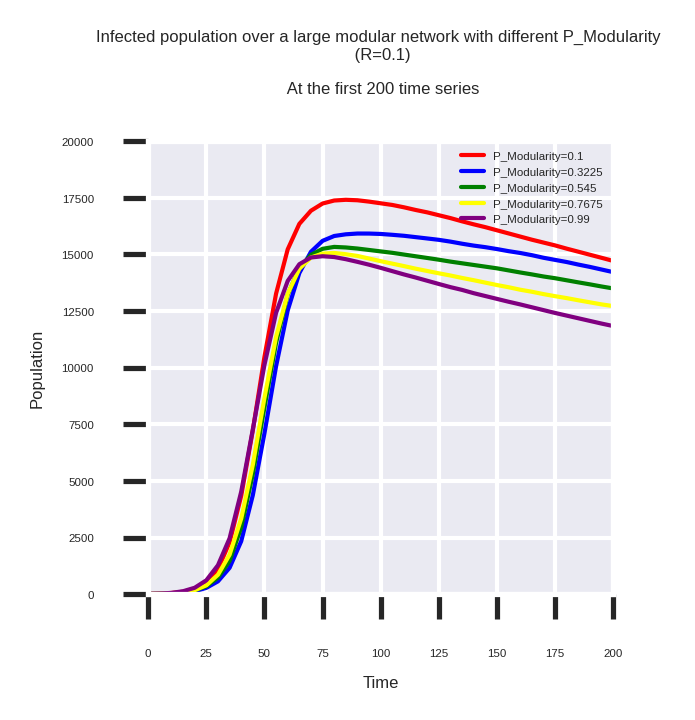

In [61]:
fig = plt.figure(figsize=(2, 2))
ax = fig.gca()

# plot the size of the infected population
ax.plot(ts, Results_large_connectivity[0], 'r', label='P_Modularity=0.1', linewidth=1)
ax.plot(ts, Results_large_connectivity[1], 'b', label='P_Modularity=0.3225', linewidth=1)
ax.plot(ts, Results_large_connectivity[2], 'g', label='P_Modularity=0.545', linewidth=1)
ax.plot(ts, Results_large_connectivity[3], 'yellow', label='P_Modularity=0.7675', linewidth=1)
ax.plot(ts, Results_large_connectivity[4], 'purple', label='P_Modularity=0.99', linewidth=1)
T=200
ax.set_xlabel('Time',fontsize=4)
ax.set_xlim([0, T])
ax.set_ylabel('Population',fontsize=4)

ax.set_title('Infected population over a large modular network with different P_Modularity \n (R=0.1)\n\n At the first 200 time series', y=1.05,fontsize=4)
plt.legend(loc = 'upper right')
plt.ylim(0,20000)
plt.show()

## Results for different connectivity in large core-periphery networks¶
R=0.1

In [55]:
Results_large_connectivity_cp=[] 

In [56]:
# Read results in json format
with open('Results/core-periphery-experiments-11.json','r') as f:
    data = json.loads(f.read())

df_nested_list = pd.json_normalize(
    data, 
    record_path =['resultsets','epyc.resultset.default','results']
    )
df=df_nested_list

In [57]:
#Calculate average
pm=pModularity
n=3
for pc in pm:
    print(pc)
    df_filter = df.loc[df['parameters.coreperiphery.connectivity']==pc]
    index=min(list(df_filter.index))
    ts_min = min(list(len(df_filter['results.epydemic.monitor.observations'][i]) for i in range(index,index+n) ))
    ts = df_filter['results.epydemic.monitor.observations'][index][0:ts_min]
   
    mean_sss=[]
    mean_iis=[]
    mean_rrs=[]
    
    # calculate the average value after running each experiment for 3 times
    for m in range(ts_min):
        sum_ss=sum_ii=sum_rr=0
        for i in range(index,index+n):
            sum_ss += df['results.epydemic.monitor.timeseries-epydemic.sir.S'][i][m]
            sum_ii += df['results.epydemic.monitor.timeseries-epydemic.sir.I'][i][m]
            sum_rr += df['results.epydemic.monitor.timeseries-epydemic.sir.R'][i][m]

        mean_sss.append(sum_ss/n)
        mean_iis.append(sum_ii/n)
        mean_rrs.append(sum_rr/n)
    Results_large_connectivity_cp.append(mean_iis)

0.1
0.3225
0.545
0.7675
0.99


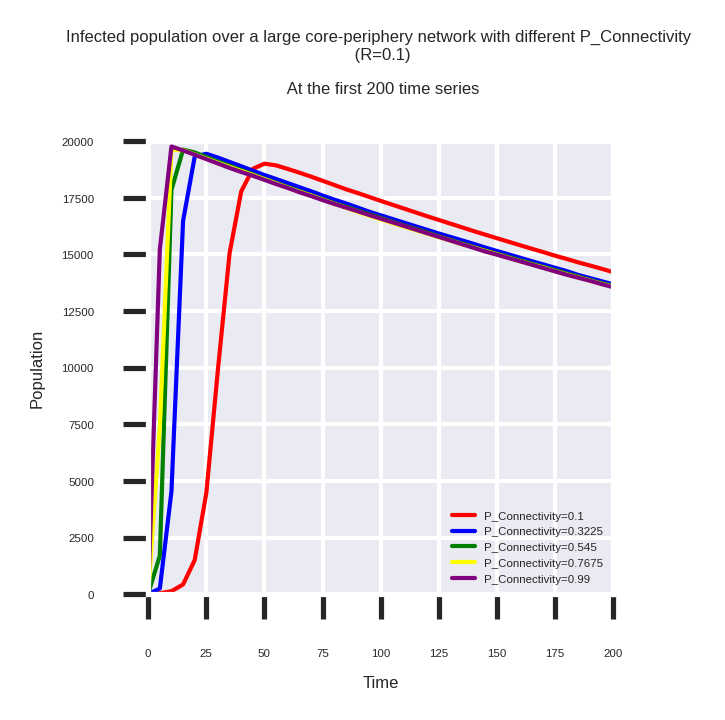

In [58]:
fig = plt.figure(figsize=(2, 2))
ax = fig.gca()

# plot the size of the infected population
ax.plot(ts, Results_large_connectivity_cp[0], 'r', label='P_Connectivity=0.1', linewidth=1)
ax.plot(ts, Results_large_connectivity_cp[1], 'b', label='P_Connectivity=0.3225', linewidth=1)
ax.plot(ts, Results_large_connectivity_cp[2], 'g', label='P_Connectivity=0.545', linewidth=1)
ax.plot(ts, Results_large_connectivity_cp[3], 'yellow', label='P_Connectivity=0.7675', linewidth=1)
ax.plot(ts, Results_large_connectivity_cp[4], 'purple', label='P_Connectivity=0.99', linewidth=1)
T=200
ax.set_xlabel('Time',fontsize=4)
ax.set_xlim([0, T])
ax.set_ylabel('Population',fontsize=4)
ax.set_title('Infected population over a large core-periphery network with different P_Connectivity \n (R=0.1)\n\n At the first 200 time series', y=1.05,fontsize=4)
plt.legend(loc = 'lower right')
plt.ylim(0,20000)
plt.show()

## Results of large sizes

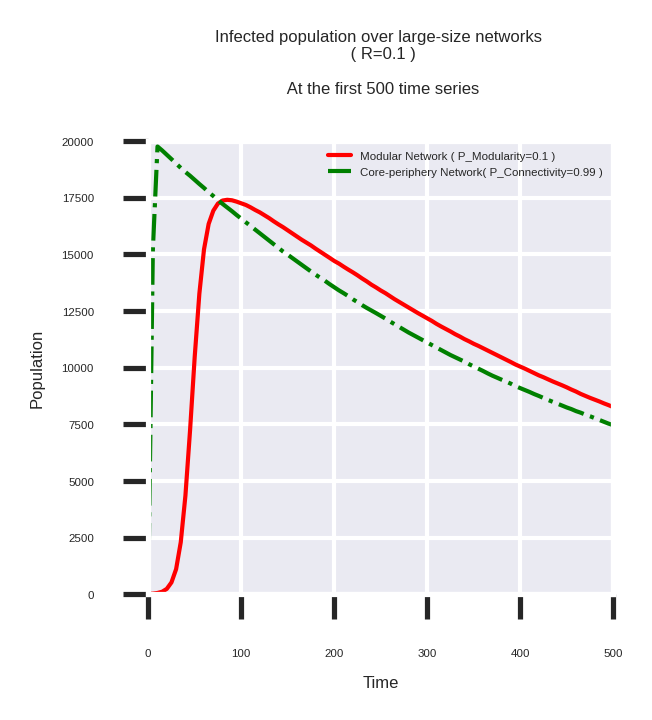

In [63]:
fig = plt.figure(figsize=(2, 2))
ax = fig.gca()

# plot the size of the infected population
ax.plot(ts, Results_large_connectivity[0], 'r', label='Modular Network ( P_Modularity=0.1 )', linewidth=1)
ax.plot(ts, Results_large_connectivity_cp[4], 'g', label='Core-periphery Network( P_Connectivity=0.99 )', linewidth=1,linestyle='-.')
T=500
ax.set_xlabel('Time',fontsize=4)
ax.set_xlim([0, T])
ax.set_ylabel('Population',fontsize=4)
plt.ylim(0,20000)
ax.set_title('Infected population over large-size networks \n ( R=0.1 )\n\n At the first 500 time series', y=1.05,fontsize=4)
plt.legend(loc = 'upper right')
plt.ylim(0,20000)
plt.show()

## Results for different connectivity in small modular networks
R=0.1

In [78]:
Results_small_connectivity=[] 
# Read results in json format
with open('Results/modular-experiments-5.json','r') as f:
    data = json.loads(f.read())

df_nested_list = pd.json_normalize(
    data, 
    record_path =['resultsets','epyc.resultset.default','results']
    )
df=df_nested_list

In [79]:
#Calculate average
pm=pModularity
n=3
for pc in pm:
    print(pc)
    df_filter = df.loc[df['parameters.modular.modularity']==pc]
    index=min(list(df_filter.index))
    ts_min = min(list(len(df_filter['results.epydemic.monitor.observations'][i]) for i in range(index,index+n) ))
    ts = df_filter['results.epydemic.monitor.observations'][index][0:ts_min]
   
    mean_sss=[]
    mean_iis=[]
    mean_rrs=[]
    
    # calculate the average value after running each experiment for 3 times
    for m in range(ts_min):
        sum_ss=sum_ii=sum_rr=0
        for i in range(index,index+n):
            sum_ss += df['results.epydemic.monitor.timeseries-epydemic.sir.S'][i][m]
            sum_ii += df['results.epydemic.monitor.timeseries-epydemic.sir.I'][i][m]
            sum_rr += df['results.epydemic.monitor.timeseries-epydemic.sir.R'][i][m]

        mean_sss.append(sum_ss/n)
        mean_iis.append(sum_ii/n)
        mean_rrs.append(sum_rr/n)
    Results_small_connectivity.append(mean_iis)

0.1
0.3225
0.545
0.7675
0.99


## Results for different connectivity in small core-periphery networks¶
R=0.1

In [80]:
Results_small_connectivity_cp=[] 
# Read results in json format
with open('Results/core-periphery-experiments-15.json','r') as f:
    data = json.loads(f.read())

df_nested_list = pd.json_normalize(
    data, 
    record_path =['resultsets','epyc.resultset.default','results']
    )
df=df_nested_list

In [81]:
#Calculate average
pm=pModularity
n=3
for pc in pm:
    print(pc)
    df_filter = df.loc[df['parameters.coreperiphery.connectivity']==pc]
    index=min(list(df_filter.index))
    ts_min = min(list(len(df_filter['results.epydemic.monitor.observations'][i]) for i in range(index,index+n) ))
    ts = df_filter['results.epydemic.monitor.observations'][index][0:ts_min]
   
    mean_sss=[]
    mean_iis=[]
    mean_rrs=[]
    
    # calculate the average value after running each experiment for 3 times
    for m in range(ts_min):
        sum_ss=sum_ii=sum_rr=0
        for i in range(index,index+n):
            sum_ss += df['results.epydemic.monitor.timeseries-epydemic.sir.S'][i][m]
            sum_ii += df['results.epydemic.monitor.timeseries-epydemic.sir.I'][i][m]
            sum_rr += df['results.epydemic.monitor.timeseries-epydemic.sir.R'][i][m]

        mean_sss.append(sum_ss/n)
        mean_iis.append(sum_ii/n)
        mean_rrs.append(sum_rr/n)
    Results_small_connectivity_cp.append(mean_iis)

0.1
0.3225
0.545
0.7675
0.99


## Results of small sizes

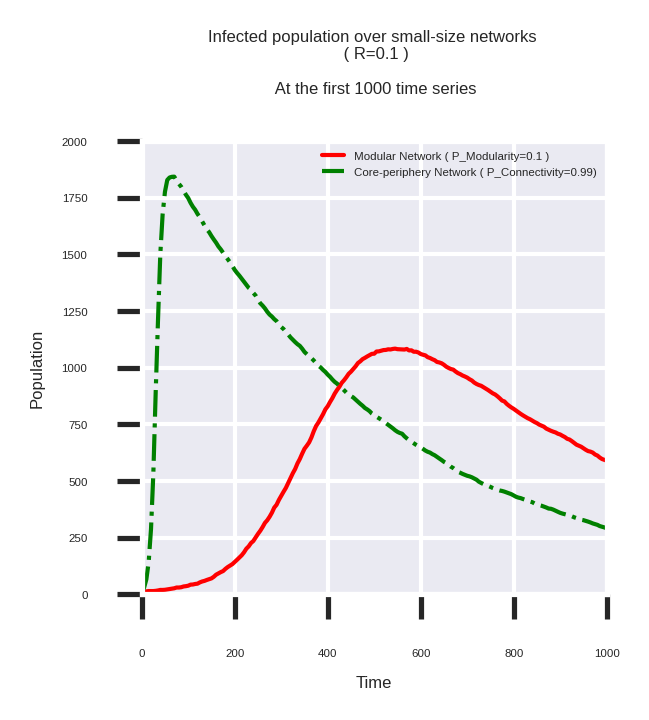

In [84]:
fig = plt.figure(figsize=(2, 2))
ax = fig.gca()

# plot the size of the infected population
ax.plot(ts, Results_small_connectivity[0], 'r', label='Modular Network ( P_Modularity=0.1 )', linewidth=1)
ax.plot(ts, Results_small_connectivity_cp[4], 'g', label='Core-periphery Network ( P_Connectivity=0.99)', linewidth=1, linestyle='-.')
T=1000
ax.set_xlabel('Time',fontsize=4)
ax.set_xlim([0, T])
ax.set_ylabel('Population',fontsize=4)
ax.set_title('Infected population over small-size networks \n ( R=0.1 )\n\n At the first 1000 time series', y=1.05,fontsize=4)
plt.legend(loc = 'upper right')
plt.ylim(0,2000)
plt.show()

## Change P_infect in small-size modular

In [90]:
Results_small_connectivity=[] 
# Read results in json format
with open('Results/modular-experiments-10.json','r') as f:
    data = json.loads(f.read())

df_nested_list = pd.json_normalize(
    data, 
    record_path =['resultsets','epyc.resultset.default','results']
    )
df1=df_nested_list

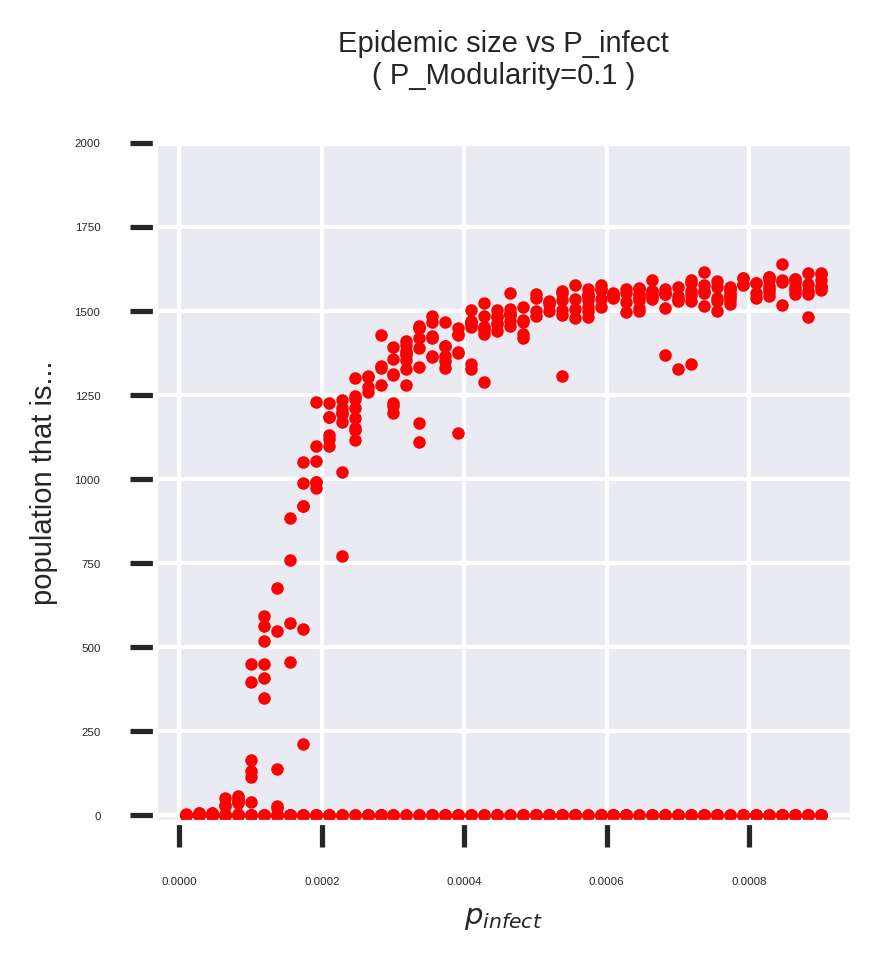

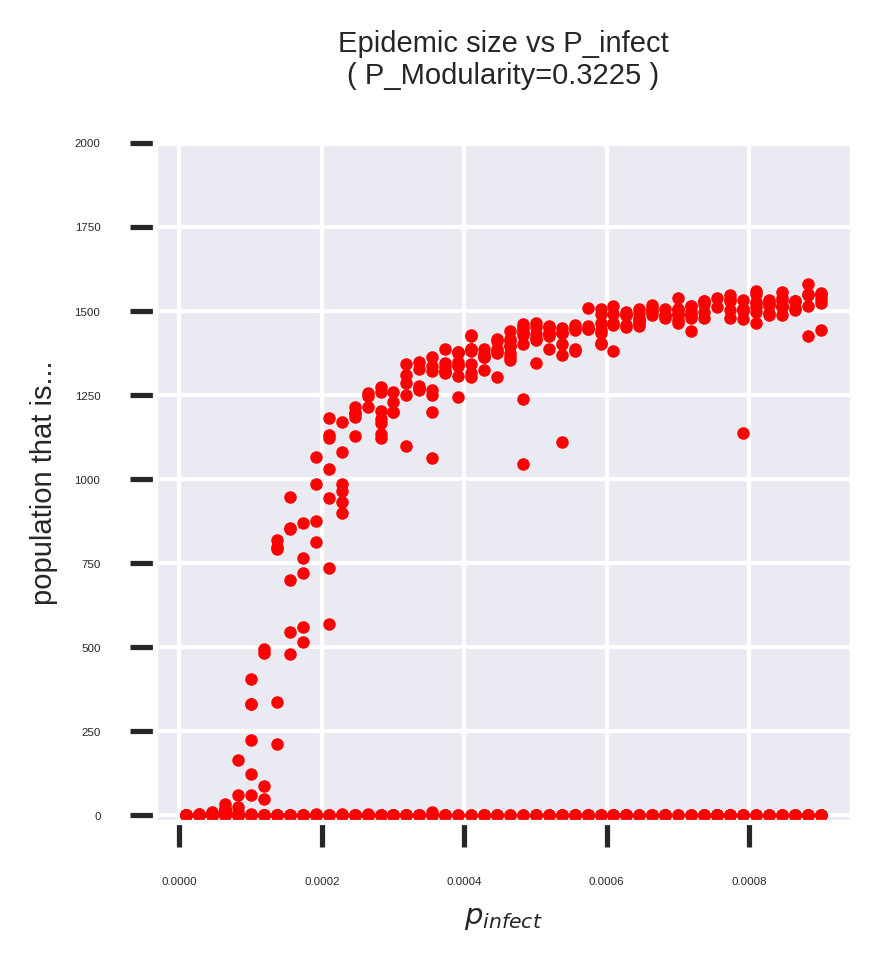

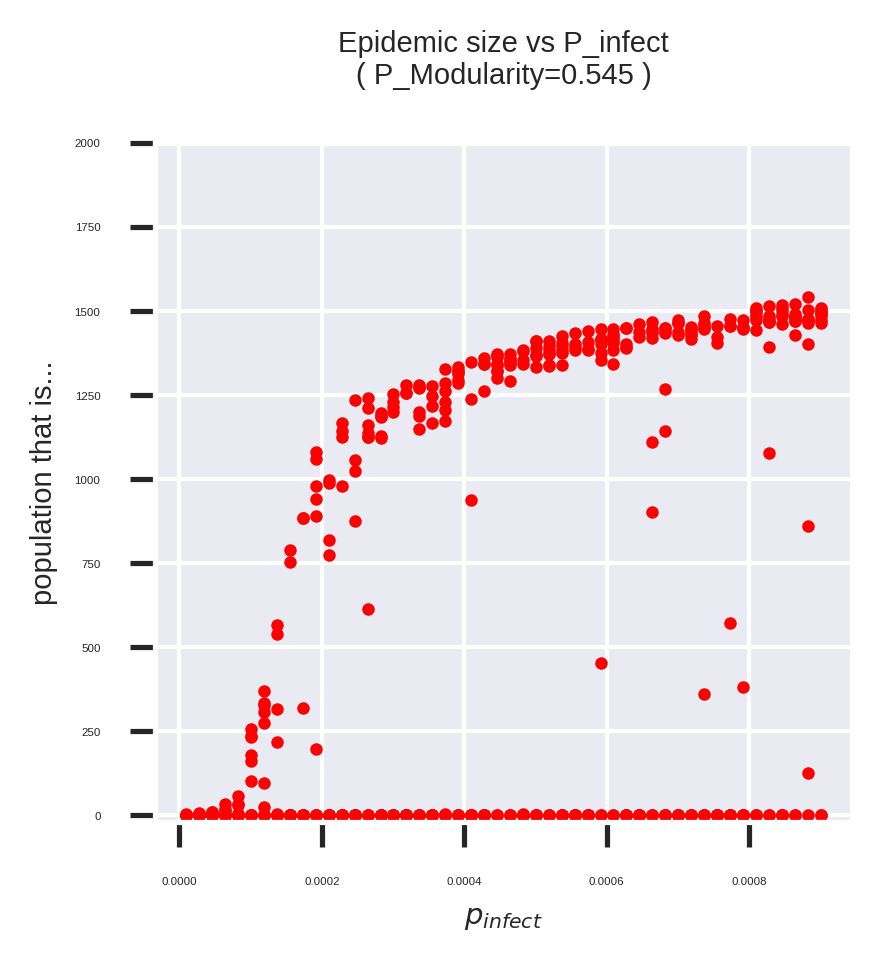

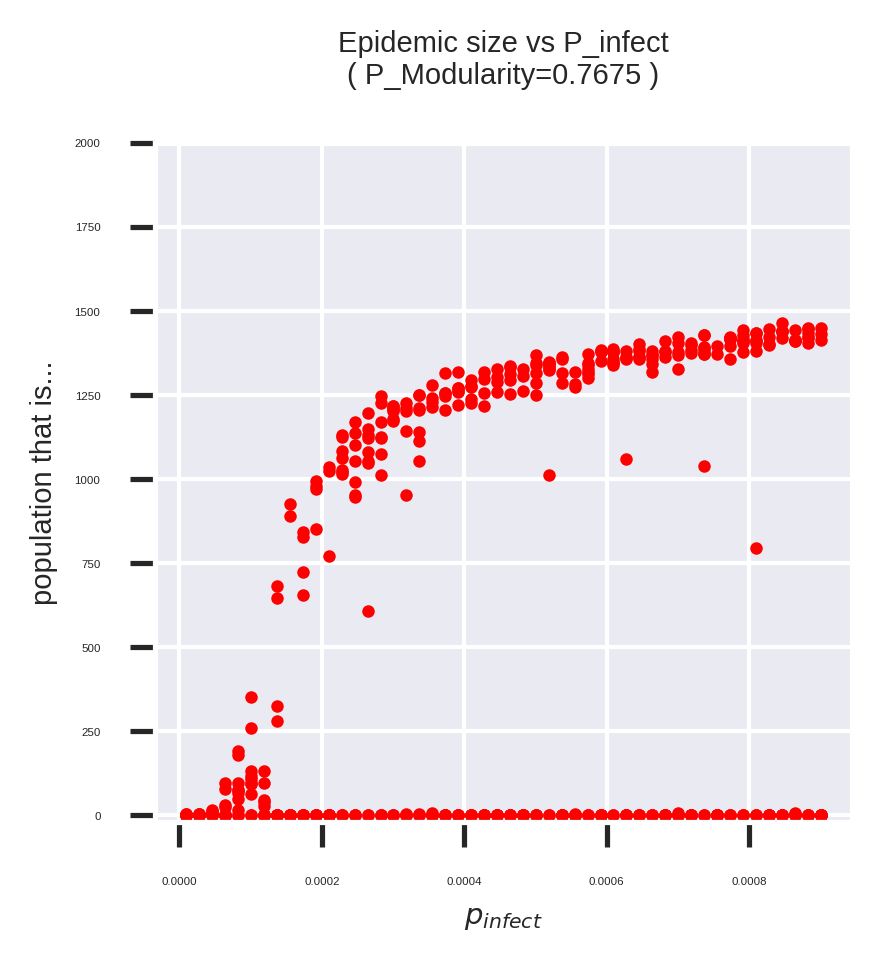

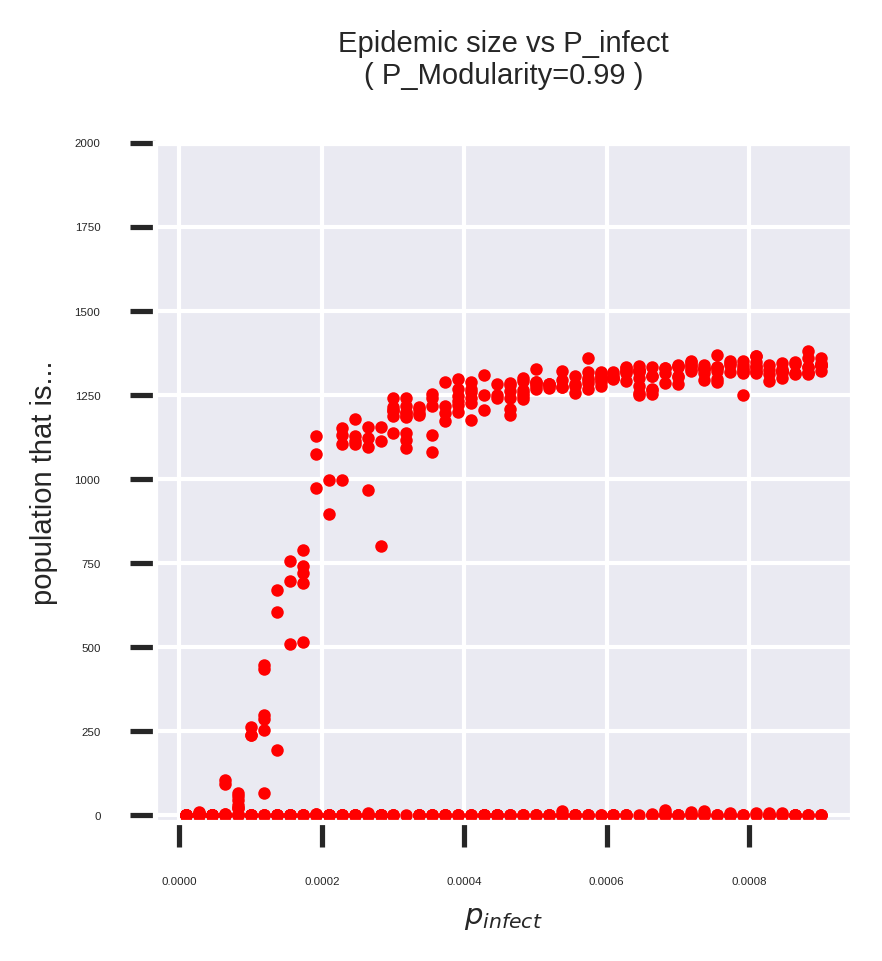

In [91]:

for pc in list(pModularity):
    df_filter = df1.loc[df1['parameters.modular.modularity']==pc]
    fig = plt.figure(figsize=(3, 3))
    ax = fig.gca()

    # plot the size of the removed population
    ax.plot(df_filter['parameters.epydemic.sir.pInfect'],
            df_filter['results.epydemic.sir.R'], 'r.')
    ax.set_xlabel('$p_{\\mathit{infect}}$',fontsize=7)
    ax.set_ylabel('population that is...', fontsize=7)
#     ax.set_title('Epidemic size vs $p_{\\mathit{infect}}$, P_Modularity={c}'.format(c=pc), y=1.05)
    ax.set_title('Epidemic size vs P_infect\n( P_Modularity={c} )'.format(c=pc), y=1.05,fontsize=7)
    plt.ylim(-20,2000)
    plt.show()

## Get Probability of dying out in Modular

In [92]:
die_out=[]
for pc in list(pModularity):
    df_f=df1.loc[df1['parameters.modular.modularity']==pc]
    df_f=df_f.loc[df_f['results.epydemic.sir.R']<15]
    print(pc,":",len(df_f))
    die_out.append(len(df_f)/500)

0.1 : 231
0.3225 : 235
0.545 : 249
0.7675 : 249
0.99 : 257


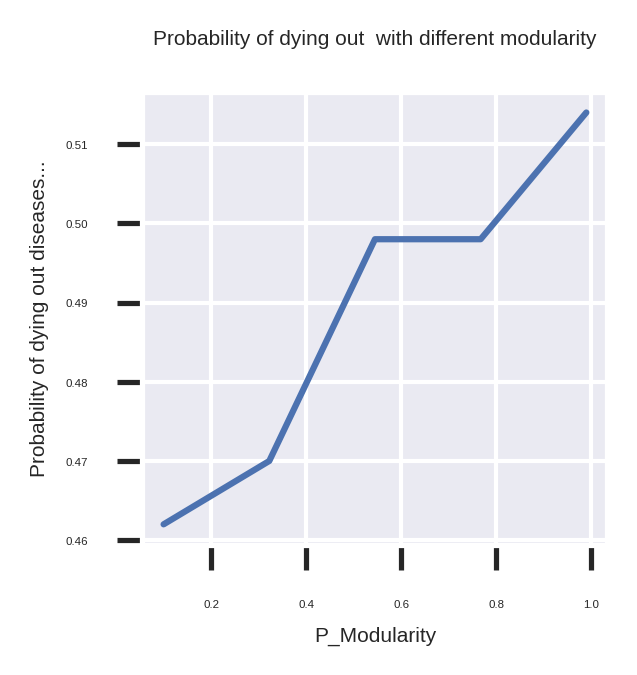

In [93]:
fig_dieout = plt.figure(figsize=(2, 2))
ax = fig_dieout.gca()
ax.plot(list(pModularity),
            die_out)
ax.set_title('Probability of dying out  with different modularity', y=1.05,fontsize=5)
ax.set_xlabel('P_Modularity',fontsize=5)

ax.set_ylabel('Probability of dying out diseases...',fontsize=5)

plt.show()


## Change P_infect in small-size core-periphery

In [94]:

# Read results in json format
with open('Results/core-periphery-experiments-20.json','r') as f:
    data = json.loads(f.read())
    

df_nested_list = pd.json_normalize(
    data, 
    record_path =['resultsets','epyc.resultset.default','results']
    )
df1=df_nested_list

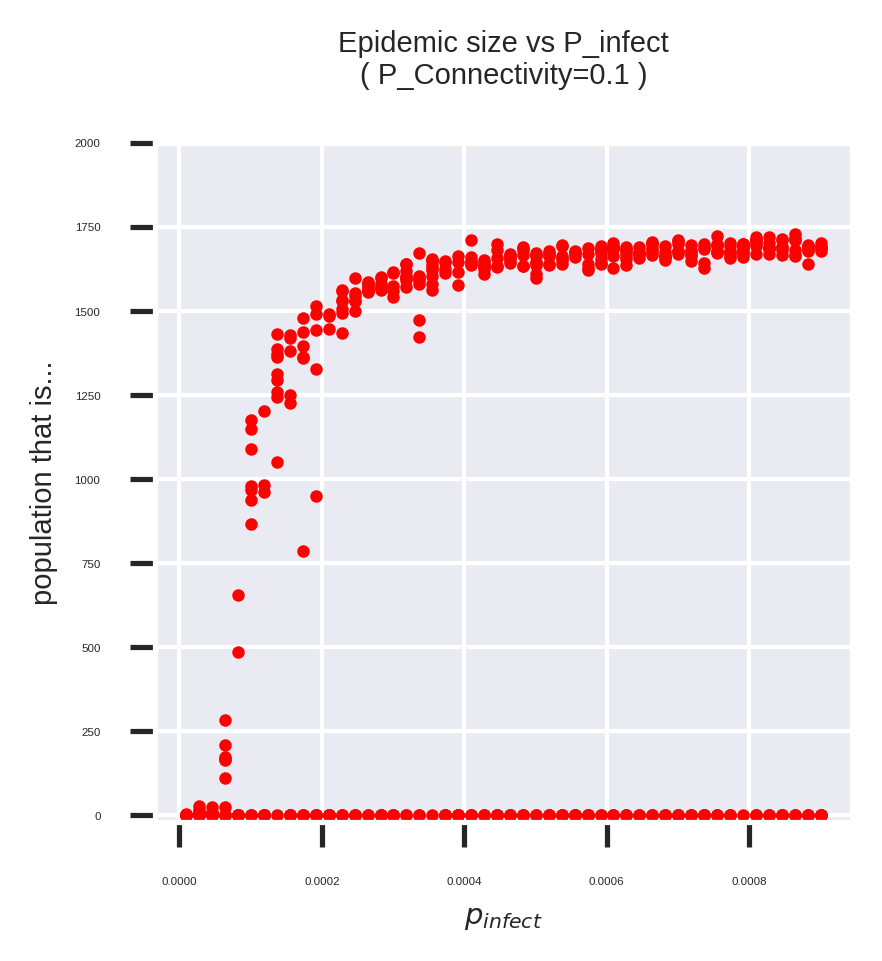

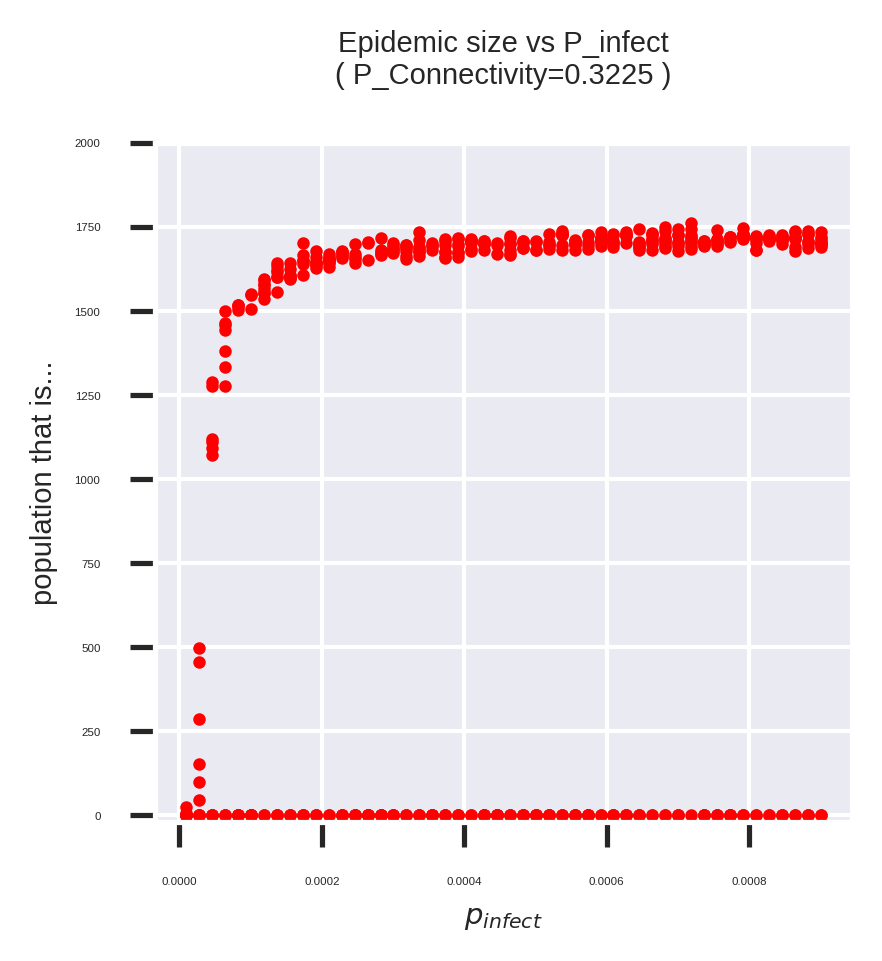

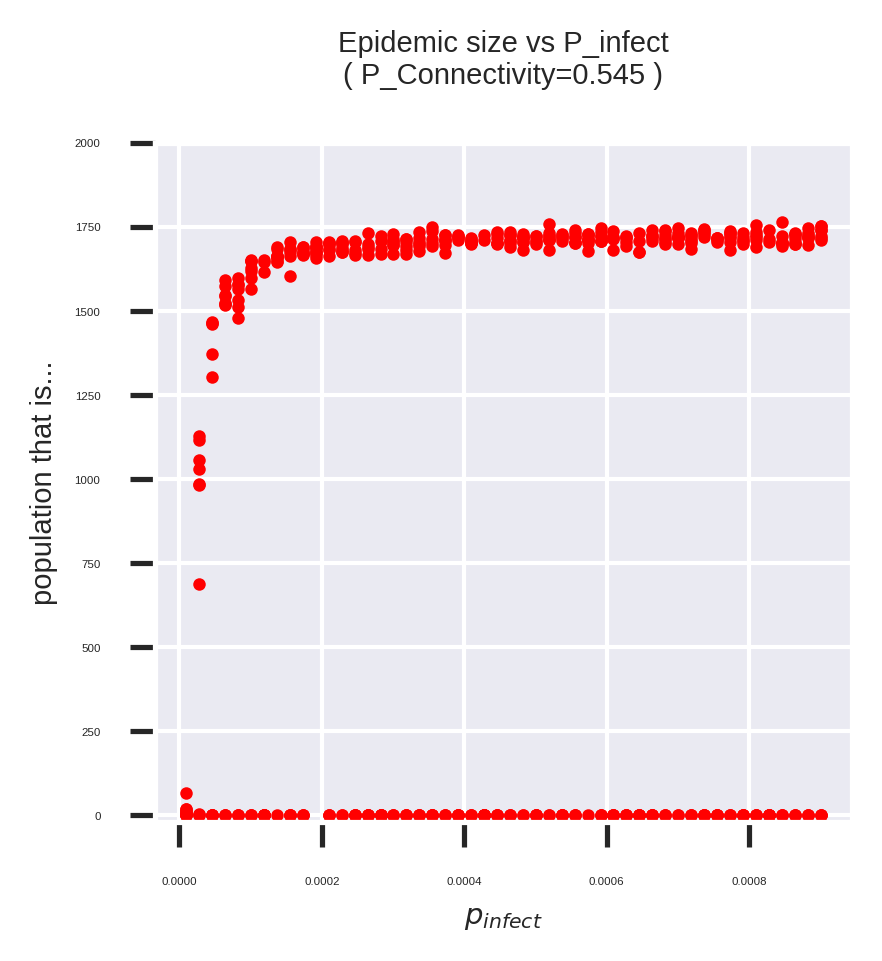

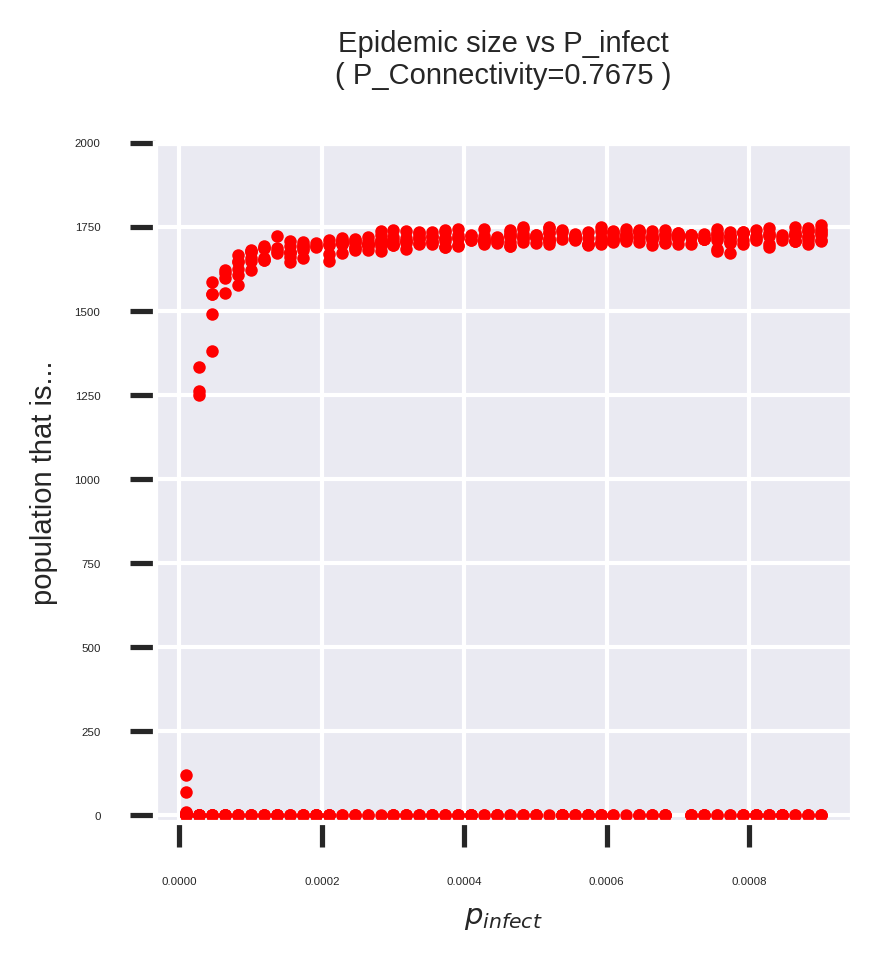

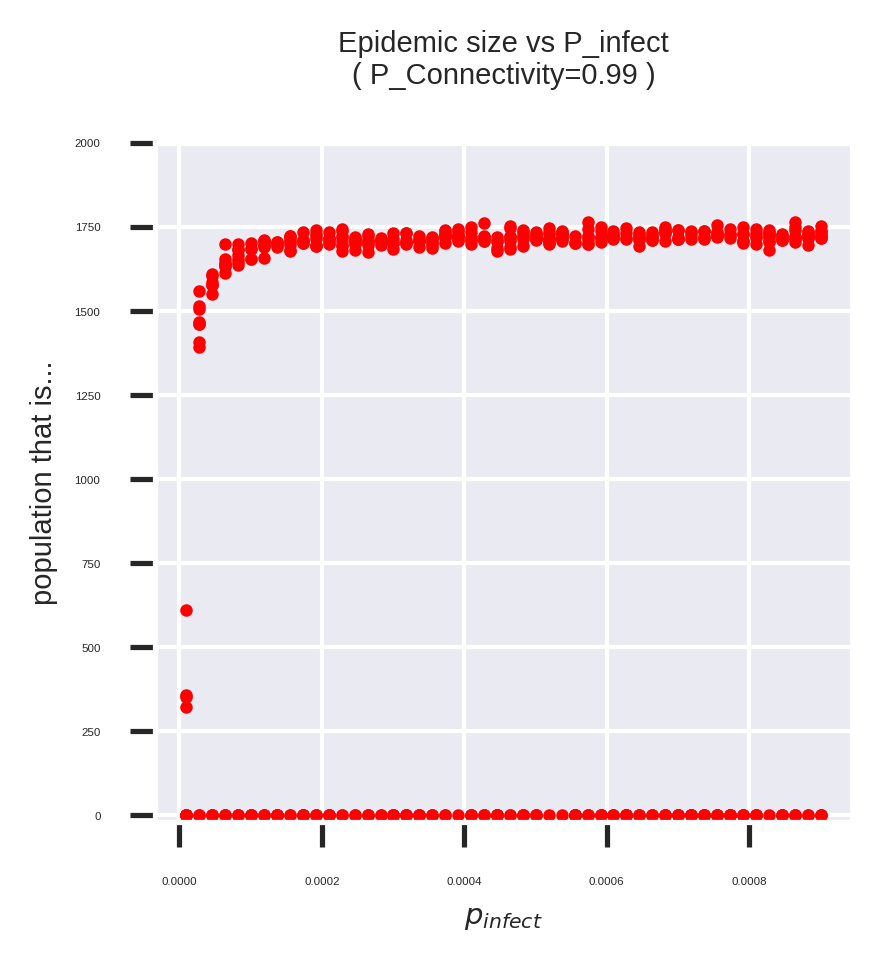

In [95]:

for pc in list(pModularity):
    df_filter = df1.loc[df1['parameters.coreperiphery.connectivity']==pc]
    fig = plt.figure(figsize=(3, 3))
    ax = fig.gca()

    # plot the size of the removed population
    ax.plot(df_filter['parameters.epydemic.sir.pInfect'],
            df_filter['results.epydemic.sir.R'], 'r.')
    ax.set_xlabel('$p_{\\mathit{infect}}$',fontsize=7)
    ax.set_ylabel('population that is...', fontsize=7)
#     ax.set_title('Epidemic size vs $p_{\\mathit{infect}}$, P_Modularity={c}'.format(c=pc), y=1.05)
    ax.set_title('Epidemic size vs P_infect\n( P_Connectivity={c} )'.format(c=pc), y=1.05,fontsize=7)
    plt.ylim(-20,2000)
    plt.show()

## Get Probability of dying out in Core-periphery

In [98]:
die_out=[]
pConnectivity = numpy.linspace(0.10, 0.99 , num=5, endpoint=True)
for pc in list(pConnectivity):
    df_f=df1.loc[df1['parameters.coreperiphery.connectivity']==pc]
    df_f=df_f.loc[df_f['results.epydemic.sir.R']<15]
    print(pc,":",len(df_f))
    die_out.append(len(df_f)/500)

0.1 : 205
0.3225 : 188
0.545 : 193
0.7675 : 188
0.99 : 176


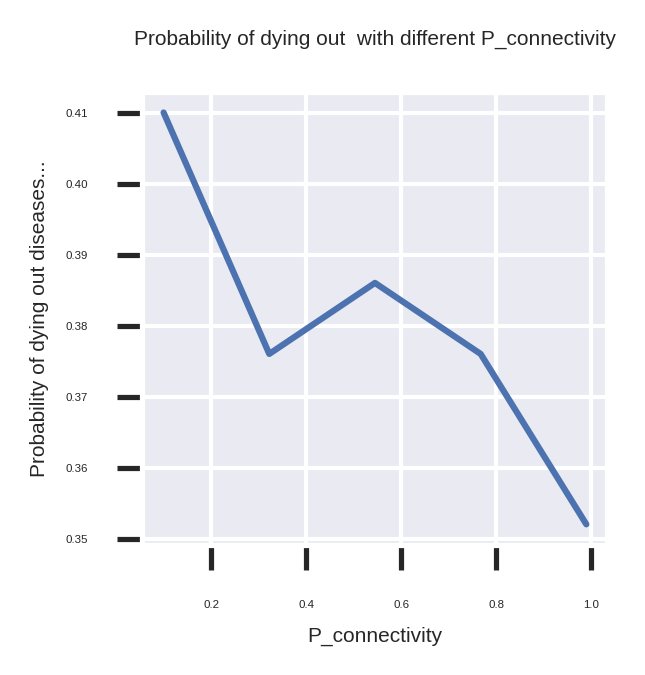

In [99]:
fig_dieout = plt.figure(figsize=(2, 2))
ax = fig_dieout.gca()
ax.plot(list(pConnectivity),
            die_out)
ax.set_title('Probability of dying out  with different P_connectivity', y=1.05,fontsize=5)
ax.set_xlabel('P_connectivity',fontsize=5)

ax.set_ylabel('Probability of dying out diseases...',fontsize=5)

plt.show()
